## PROBLEM STATEMENT
## Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies=pd.read_fwf('zee-movies.dat',encoding='ISO-8859-1')
users=pd.read_fwf('zee-users.dat',encoding='ISO-8859-1')
ratings=pd.read_fwf('zee-ratings.dat',encoding='ISO-8859-1')

## Define Problem Statement and Formatting the Data (20 points)

### 1. Definition of the problem (as per the given problem statement with additional views)

### 2. Formatting the data files to bring them into a workable format

### 3. Merging the data files and creating a single consolidated dataframe

In [3]:
movies.shape

(3883, 3)

In [4]:
movies=movies['Movie ID::Title::Genres'].str.split('::',expand=True)
movies.columns=['MovieID','title','genres']

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   object
 1   title    3883 non-null   object
 2   genres   3858 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [6]:
movies.describe()

,MovieID,title,genres
count,3883,3883,3858
unique,3883,3883,360
top,1,Toy Story (1995),Drama
freq,1,1,830


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   object
 1   title    3883 non-null   object
 2   genres   3858 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [8]:
"""
m=movies.copy()
m['genres'] = m['genres'].str.split('|')
m = m.explode('genres')
m=m[m['genres'].isin(['Animation', 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
        'Western', 'Children'])]
"""

"\nm=movies.copy()\nm['genres'] = m['genres'].str.split('|')\nm = m.explode('genres')\nm=m[m['genres'].isin(['Animation', 'Comedy', 'Adventure', 'Fantasy',\n       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',\n       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',\n        'Western', 'Children'])]\n"

In [9]:
ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [10]:
ratings=ratings['UserID::MovieID::Rating::Timestamp'].str.split('::',expand=True)
ratings.columns=['UserID','MovieID','Rating','Timestamp']

In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  object
 1   MovieID    1000209 non-null  object
 2   Rating     1000209 non-null  object
 3   Timestamp  1000209 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB


In [12]:
users=users['UserID::Gender::Age::Occupation::Zip-code'].str.split('::',expand=True)
users.columns=['UserID','Gender','Age','Occupation','Zip-code']

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   object
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   object
 3   Occupation  6040 non-null   object
 4   Zip-code    6040 non-null   object
dtypes: object(5)
memory usage: 236.1+ KB


In [14]:
s=movies.merge(ratings,on='MovieID')
df=s.merge(users,on='UserID')

## Performing EDA, Data Cleaning, and Feature Engineering (20 Points)

### 1. Reviewing the shape and structure of the dataset

### 2. Performing necessary type conversion and deriving new features

### 3. Investigating the data for any inconsistency

### 4. Group the data according to the average rating and no. of ratings

In [15]:
df.shape

(1000209, 10)

In [16]:
df['MovieID']=df.MovieID.apply(lambda x: int(x))

In [17]:
df = df[~df['genres'].isna()]

In [18]:
df['year']=df.title.str[-5:-1]

In [19]:
df['UserID']=df.UserID.apply(lambda x: int(x))
df['Rating']=df.Rating.apply(lambda x: int(x))
df['Timestamp']=df.Timestamp.apply(lambda x: int(x))

In [20]:
from datetime import datetime
df['hour'] = df['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)

In [21]:
df.UserID=df.UserID.apply(lambda x: int(x))
df.Age=df.Age.apply(lambda x: int(x))
df.Occupation=df.Occupation.apply(lambda x: int(x))

In [22]:
df.drop('Timestamp',axis=1,inplace=True)

### Group the data according to the average rating and no. of ratings

In [23]:
df.groupby('UserID')['Rating'].mean().reset_index()

,UserID,Rating
0,1,4.188679
1,2,3.713178
2,3,3.901961
3,4,4.190476
4,5,3.146465
...,...,...
6035,6036,3.297052
6036,6037,3.715000
6037,6038,3.800000
6038,6039,3.875000


In [24]:
df.groupby('UserID')['Rating'].count().reset_index()

,UserID,Rating
0,1,53
1,2,129
2,3,51
3,4,21
4,5,198
...,...,...
6035,6036,882
6036,6037,200
6037,6038,20
6038,6039,120


In [25]:
df.groupby('MovieID')['Rating'].mean().reset_index()

,MovieID,Rating
0,1,4.146846
1,2,3.201141
2,3,3.016736
3,4,2.729412
4,5,3.006757
...,...,...
3677,3948,3.635731
3678,3949,4.115132
3679,3950,3.666667
3680,3951,3.900000


In [26]:
df.groupby('MovieID')['Rating'].count().reset_index()

,MovieID,Rating
0,1,2077
1,2,701
2,3,478
3,4,170
4,5,296
...,...,...
3677,3948,862
3678,3949,304
3679,3950,54
3680,3951,40


## Build a Recommender System based on Pearson Correlation (10 Points)

In [27]:
mov=df.copy()
mov['genres'] = mov['genres'].str.split('|')
mov = mov.explode('genres')
mov=mov[mov['genres'].isin(['Animation', 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
        'Western', 'Children'])]

### 1. Creating a pivot table of movie titles & user id and imputing the NaN values

In [28]:
mov=mov.pivot_table(index='UserID', columns='title', values='Rating')
mov =mov.fillna(0)

In [29]:
ct=mov.corr()

### 2.Use the Item-based approach to create a simple recommender system that uses Pearson Correlation

In [30]:
a=input('Enter the movie title: ')
ct[a].sort_values(ascending=False).iloc[:10]

Enter the movie title: Toy Story (1995)


title
Toy Story (1995)                       1.000000
Toy Story 2 (1999)                     0.487370
Aladdin (1992)                         0.470753
Lion King, The (1994)                  0.411131
Groundhog Day (1993)                   0.407547
Bug's Life, A (1998)                   0.402679
Beauty and the Beast (1991)            0.395510
Babe (1995)                            0.378794
Wayne's World (1992)                   0.370424
There's Something About Mary (1998)    0.357726
Name: Toy Story (1995), dtype: float64

## Build a Recommender System based on Cosine Similarity. (20 Points)

In [31]:
## User Similarity Matrix
us=df.copy()
us=us.pivot_table(index='UserID', columns='title', values='Rating')
us=us.fillna(0)
us

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,3.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
## Item Similarity Matrix
it=df.copy()
it['genres'] = it['genres'].str.split('|')
it = it.explode('genres')
it=it[it['genres'].isin(['Animation', 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
        'Western', 'Children'])]

In [33]:
it=it.pivot_table(index='title', columns='genres', values='Rating')
it= ~it.isna()
it = it.astype(int)
it

genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
'Night Mother (1986),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
'Til There Was You (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
"'burbs, The (1989)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...And Justice for All (1979),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zachariah (1971),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
"Zed & Two Noughts, A (1985)",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Zero Effect (1998),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
from sklearn.neighbors import NearestNeighbors

In [35]:
neigh = NearestNeighbors(n_neighbors=11,metric='cosine')
neigh.fit(it)

NearestNeighbors(metric='cosine', n_neighbors=11)

In [36]:
movies.MovieID=movies.MovieID.apply(lambda x: int(x))

In [37]:
b=input('Enter the name of the movie: ')
n=neigh.kneighbors(it.loc[b].values.reshape(1,-1),11,return_distance=False)
movies[movies.MovieID.isin(n[0])]

Enter the name of the movie: Toy Story (1995)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,MovieID,title,genres
137,139,Target (1995),Action|Drama
319,322,Swimming with Sharks (1995),Comedy|Drama
548,552,"Three Musketeers, The (1993)",Action|Adventure|Comedy
640,645,Nelly & Monsieur Arnaud (1995),Drama
766,776,Babyfever (1994),Comedy|Drama
2747,2816,Iron Eagle II (1988),Action|War
2776,2845,White Boys (1999),Drama
2992,3061,Holiday Inn (1942),Comedy|Musical
3297,3366,Where Eagles Dare (1969),Action|Adventure|War
3298,3367,"Devil's Brigade, The (1968)",War


## Build a Recommender System based on Matrix Factorization. (30 Points)



In [38]:
rm_raw = ratings[['UserID', 'MovieID', 'Rating']].copy()
rm_raw.columns = ['UserId', 'ItemId', 'Rating'] 
rm_raw.head()

,UserId,ItemId,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [39]:
from cmfrec import CMF
model = CMF(k=7,lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(rm_raw)

/opt/anaconda3/lib/python3.9/site-packages/cmfrec/__init__.py:132: UserWarning: Attempting to use more than 1 thread, but package was built without multi-threading support - see the project's GitHub page for more information.
  warnings.warn(msg_omp)


Collective matrix factorization model
(explicit-feedback variant)


In [40]:
rm = ratings.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
rm=rm.astype(int)
rm.head()

MovieID,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
rm__ = np.dot(model.A_, model.B_.T) + model.glob_mean_
mse(rm.values[rm > 0], rm__[rm > 0])**0.5

1.509118434433985

In [42]:
mape(rm.values[rm > 0], rm__[rm > 0])

0.4277082530313631

In [43]:
top_items = model.topN(user=5, n=10)
top_items=pd.Series(top_items)
top_items=top_items.apply(lambda x: int(x)).values
movies.loc[movies.MovieID.isin(top_items)]

,MovieID,title,genres
52,53,Lamerica (1994),Drama
910,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Film-Noir
911,923,Citizen Kane (1941),Drama
989,1002,Ed's Next Move (1996),Comedy
1194,1212,"Third Man, The (1949)",Mystery|Thriller
1997,2066,Out of the Past (1947),Film-Noir
2770,2839,West Beirut (West Beyrouth) (1998),Drama
3065,3134,"Grand Illusion (Grande illusion, La) (1937)",Drama|War
3074,3143,Hell in the Pacific (1968),Drama|War
3739,3808,Two Women (La Ciociara) (1961),Drama|War


In [44]:
model2=model.swap_users_and_items(precompute=True)

/opt/anaconda3/lib/python3.9/site-packages/cmfrec/__init__.py:132: UserWarning: Attempting to use more than 1 thread, but package was built without multi-threading support - see the project's GitHub page for more information.
  warnings.warn(msg_omp)


In [45]:
top_items1 = model2.topN(user=8, n=20)
top_items1=pd.Series(top_items1)
top_items1=top_items1.apply(lambda x: int(x)).values
movies.loc[movies.MovieID.isin(top_items1)]


,MovieID,title,genres
138,140,Up Close and Personal (1996),Drama|Romance
659,665,Underground (1995),War
960,972,"Last Time I Saw Paris, The (1954)",Drama
1195,1213,GoodFellas (1990),Crime|Drama
1312,1332,"Believers, The (1987)",Horror|Thriller
1414,1439,Meet Wally Sparks (1997),Comedy
1420,1445,McHale's Navy (1997),Comedy|War
1795,1864,Sour Grapes (1998),Comedy
1838,1907,Mulan (1998),Animation|Children's
1858,1927,All Quiet on the Western Front (1930),War


In [46]:
movies.loc[movies.MovieID==5]

,MovieID,title,genres
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
users.UserID=users.UserID.apply(lambda x: int(x))

In [48]:
top_items1

array([1213,  665, 4811, 3570, 2108, 3078, 5693, 3455, 2582, 5380, 1864,
       1332, 2513, 1445,  972,  140, 1439, 1907, 5145, 1927])

### Visualization of embeddings for Item-Item Similarity matrix

In [49]:
from cmfrec import CMF
model1 = CMF(k=2, user_bias=False, item_bias=False, verbose=False)
model1.fit(rm_raw)

/opt/anaconda3/lib/python3.9/site-packages/cmfrec/__init__.py:132: UserWarning: Attempting to use more than 1 thread, but package was built without multi-threading support - see the project's GitHub page for more information.
  warnings.warn(msg_omp)


Collective matrix factorization model
(explicit-feedback variant)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

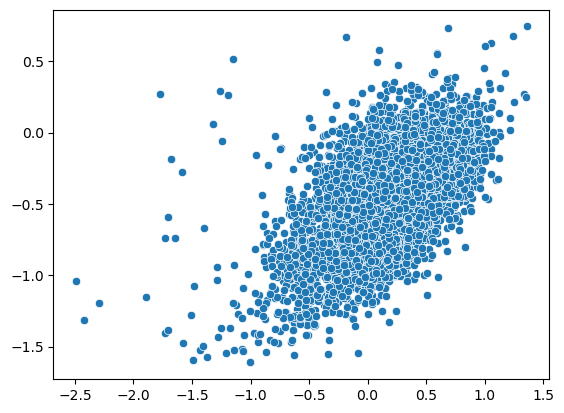

In [50]:
sns.scatterplot(model1.A_.T[0],model1.A_.T[1])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

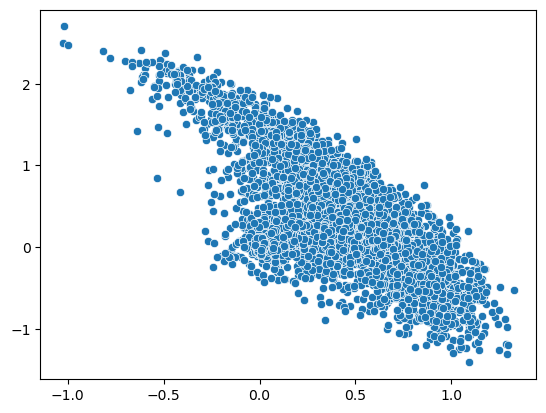

In [51]:
sns.scatterplot(model1.B_.T[0],model1.B_.T[1])

# Questionnaire:

### 1. Users of which age group have watched and rated the most number of movies?

#### =>User in the age group of 25 watched and rated the most number of movies

In [52]:
df.groupby('Age')['Rating'].count().reset_index().sort_values(by=['Rating'],ascending=False)

,Age,Rating
2,25,394105
3,35,198084
1,18,183047
4,45,83161
5,50,72071
6,56,38544
0,1,27132


### 2. Users belonging to which profession have watched and rated the most movies?
#### => Users belonging to Occupation 4 watched and rated the most movies

In [53]:
df.groupby('Occupation')['Rating'].count().reset_index().sort_values(by=['Rating'],ascending=False)

,Occupation,Rating
4,4,130626
0,0,130001
7,7,105013
1,1,84936
17,17,72534
20,20,60098
12,12,56931
2,2,49823
14,14,48952
16,16,45815


### 3. Most of the users in our dataset who’ve rated the movies are Male. (T/F)
#### ==> True

In [54]:
df.groupby('Gender')['Rating'].count().reset_index().sort_values(by=['Rating'],ascending=False)

,Gender,Rating
1,M,750590
0,F,245554


### 4. Most of the movies present in our dataset were released in which decade?
#### ==> Most of the movies in the dataset were released in 90s

In [55]:
df1=df[['title','year']]
df1.year=df1.year.apply(lambda x: int(x))
bins = [1919,1930,1940,1950,1960,1970,1980,1990,2000]
df1['year'] = pd.cut(df1['year'], bins)
df1.groupby('year')['title'].count().reset_index().sort_values(by=['title'],ascending=False)

/var/folders/qb/r0jcfxtj39g77g5j7nzw__tm0000gn/T/ipykernel_11670/3313309839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.year=df1.year.apply(lambda x: int(x))
/var/folders/qb/r0jcfxtj39g77g5j7nzw__tm0000gn/T/ipykernel_11670/3313309839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = pd.cut(df1['year'], bins)


,year,title
7,"(1990, 2000]",542798
6,"(1980, 1990]",237204
5,"(1970, 1980]",94218
4,"(1960, 1970]",47888
3,"(1950, 1960]",35556
2,"(1940, 1950]",19660
1,"(1930, 1940]",16697
0,"(1919, 1930]",2078


### 5. The movie with maximum no. of ratings is American Beauty (1999) with 3428 ratings.

In [56]:
df.groupby('title')['Rating'].count().reset_index().sort_values(by=['Rating'],ascending=False)[:1]

,title,Rating
126,American Beauty (1999),3428


### 6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

#### 1.Shaggy Dog, The (1959)
#### 2.That Darn Cat! (1965)	
#### 3.Robin Hood: Prince of Thieves (1991)

In [57]:
b=input('Enter the name of the movie: ')
n=neigh.kneighbors(it.loc[b].values.reshape(1,-1),11,return_distance=False)
movies[movies.MovieID.isin(n[0])][:3]

Enter the name of the movie: Toy Story (1995)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,MovieID,title,genres
137,139,Target (1995),Action|Drama
319,322,Swimming with Sharks (1995),Comedy|Drama
548,552,"Three Musketeers, The (1993)",Action|Adventure|Comedy


###  7.On the basis of approach, Collaborative Filtering methods can be classified into USER-based and ITEM-based.

### 8. Pearson Correlation ranges between -1 to 1 whereas, Cosine Similarity belongs to the interval between 0 to 1

### 9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

#### 1.509118434433985 for RMSE and 0.4277082530313631 for mape

### 10. Give the sparse ‘row’ matrix representation for the following dense matrix -

[[1 0]
[3 7]]

In [58]:
mat=np.array([[1,0],[3,7]])

In [59]:
from scipy import sparse

b=sparse.csr_matrix(mat)
print(b)

  (0, 0)	1
  (1, 0)	3
  (1, 1)	7


In [136]:
df

,MovieID,title,genres,UserID,Rating,Gender,Age,Occupation,Zip-code,year,hour
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,48067,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10,48067,1995,5
2,150,Apollo 13 (1995),Drama,1,5,F,1,10,48067,1995,3
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantas,1,4,F,1,10,48067,1977,3
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10,48067,1993,5
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,M,25,4,92843,2000,20
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,M,25,4,92843,2000,20
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,M,25,4,92843,2000,20
1000207,3555,U-571 (2000),Action|Thriller,5727,3,M,25,4,92843,2000,20


In [137]:
df.columns

Index(['MovieID', 'title', 'genres', 'UserID', 'Rating', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'year', 'hour'],
      dtype='object')

In [138]:
df1=df.groupby(['MovieID','title'])['Rating','Age','Occupation','year','hour','Zip-code'].mean().reset_index()

/var/folders/qb/r0jcfxtj39g77g5j7nzw__tm0000gn/T/ipykernel_11670/672764214.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby(['MovieID','title'])['Rating','Age','Occupation','year','hour','Zip-code'].mean().reset_index()


In [139]:
df1

,MovieID,title,Rating,Age,Occupation,hour
0,1,Toy Story (1995),4.146846,27.700530,8.067886,9.673568
1,2,Jumanji (1995),3.201141,27.800285,7.680456,9.366619
2,3,Grumpier Old Men (1995),3.016736,29.276151,7.826360,10.292887
3,4,Waiting to Exhale (1995),2.729412,27.788235,6.752941,10.829412
4,5,Father of the Bride Part II (1995),3.006757,27.425676,7.506757,9.611486
...,...,...,...,...,...,...
3677,3948,Meet the Parents (2000),3.635731,27.737819,8.305104,9.534803
3678,3949,Requiem for a Dream (2000),4.115132,26.203947,7.578947,9.911184
3679,3950,Tigerland (2000),3.666667,27.851852,7.407407,8.240741
3680,3951,Two Family House (2000),3.900000,35.100000,7.800000,9.525000


In [140]:
df1
X=df1.drop(['MovieID','title'],axis=1)

In [141]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xsc=sc.fit_transform(X)

In [155]:
nn = NearestNeighbors(n_neighbors=7,metric='cosine')
nn.fit(Xsc)

NearestNeighbors(metric='cosine', n_neighbors=7)

In [176]:
n=nn.kneighbors(Xsc[0:1],11,return_distance=False)

In [177]:
n=n.flatten()

In [178]:
df1.iloc[n]

,MovieID,title,Rating,Age,Occupation,hour
0,1,Toy Story (1995),4.146846,27.700530,8.067886,9.673568
2694,2918,Ferris Bueller's Day Off (1986),4.117447,27.949762,8.107264,9.704005
2576,2797,Big (1988),3.855801,28.833669,7.975184,9.752515
2186,2391,"Simple Plan, A (1998)",3.751678,28.612081,7.979866,9.759732
3229,3481,High Fidelity (2000),3.928623,28.171886,7.925710,9.771304
2473,2692,Run Lola Run (Lola rennt) (1998),4.224813,27.567164,8.123134,9.430037
1583,1747,Wag the Dog (1997),3.489526,29.797133,7.938258,9.769570
1526,1673,Boogie Nights (1997),3.769504,28.913121,8.039894,9.563830
1615,1794,Love and Death on Long Island (1997),3.430464,29.953642,7.986755,9.688742
2543,2763,"Thomas Crown Affair, The (1999)",3.641873,29.285583,8.075298,9.781451


,MovieID,title,Rating,Age,Occupation,hour
0,1,Toy Story (1995),4.146846,27.700530,8.067886,9.673568
1,2,Jumanji (1995),3.201141,27.800285,7.680456,9.366619
2,3,Grumpier Old Men (1995),3.016736,29.276151,7.826360,10.292887
3,4,Waiting to Exhale (1995),2.729412,27.788235,6.752941,10.829412
4,5,Father of the Bride Part II (1995),3.006757,27.425676,7.506757,9.611486
...,...,...,...,...,...,...
3677,3948,Meet the Parents (2000),3.635731,27.737819,8.305104,9.534803
3678,3949,Requiem for a Dream (2000),4.115132,26.203947,7.578947,9.911184
3679,3950,Tigerland (2000),3.666667,27.851852,7.407407,8.240741
3680,3951,Two Family House (2000),3.900000,35.100000,7.800000,9.525000


In [134]:
movies[movies.MovieID==3146]

,MovieID,title,genres
3077,3146,Deuce Bigalow: Male Gigolo (1999),Comedy


In [117]:
df.iloc[0]

MovieID                                 1
title                    Toy Story (1995)
genres        Animation|Children's|Comedy
UserID                                  1
Rating                                  5
Gender                                  F
Age                                     1
Occupation                             10
Zip-code                            48067
year                                 1995
hour                                    5
Name: 0, dtype: object